In [9]:
import tensorflow
print(tensorflow.__version__)

2.13.0


* **pandas_datareader** is a convenient wrapper for importing various data sources like financial quotes, economic data, and web content directly into DataFrames.

In [2]:
# !pip install pandas_datareader
import pandas_datareader as pdr
key="5a9f85a4d70c5405e05e510f105fed8a87341212"

* **tingo** is a financial data platform providing tools for analysis, news feeds, and real-time data for investors and developers.
* **AAPL** is the ticker ( Unique alphanumeric code identifying a publicly traded security like a stock or currency.) symbol for Apple Inc

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/var/folders/yw/z906lsr979s9phgs9xz4sl840000gn/T/ipykernel_40099/1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [52]:
df.to_csv('AAPL.csv')

In [1]:
import pandas as pd
df = pd.read_csv('AAPL.csv')

In [2]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-01-02 00:00:00+00:00,157.92,158.85,154.23,154.89,37039737,37.892144,38.115293,37.006746,37.165110,148158948,0.0,1.0
1,AAPL,2019-01-03 00:00:00+00:00,142.19,145.72,142.00,143.98,91312195,34.117806,34.964812,34.072216,34.547308,365248780,0.0,1.0
2,AAPL,2019-01-04 00:00:00+00:00,148.26,148.55,143.80,144.53,58607070,35.574273,35.643857,34.504118,34.679278,234428280,0.0,1.0
3,AAPL,2019-01-07 00:00:00+00:00,147.93,148.83,145.90,148.70,54777764,35.495091,35.711042,35.008003,35.679849,219111056,0.0,1.0
4,AAPL,2019-01-08 00:00:00+00:00,150.75,151.82,148.52,149.56,41025314,36.171737,36.428478,35.636659,35.886202,164101256,0.0,1.0


In [3]:
df_close =df.reset_index()['close']
df_close

0       157.92
1       142.19
2       148.26
3       147.93
4       150.75
         ...  
1253    193.60
1254    193.05
1255    193.15
1256    193.58
1257    192.53
Name: close, Length: 1258, dtype: float64

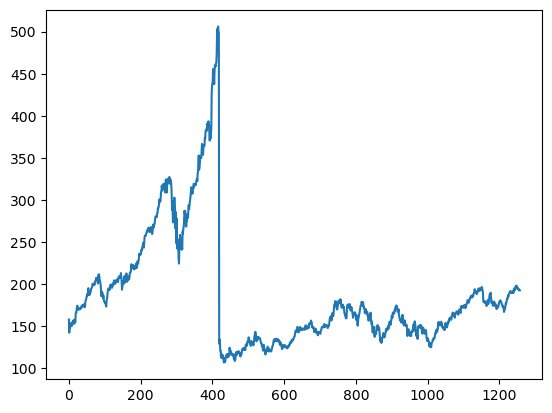

In [4]:
import matplotlib.pyplot as plt
plt.plot(df_close)

# Standardisation

In [5]:
# We apply MinMaxScalar (LSTM are sensitive to the scale of the data.)

import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [6]:
df_close

array([[0.12793989],
       [0.08854101],
       [0.10374452],
       ...,
       [0.21618034],
       [0.21725736],
       [0.21462743]])

# Train Test Split

In [7]:
# Train test split

# 65% of data - train data
train_size=int(len(df_close)*0.65)

test_size=len(df_close)-train_size

train_data,test_data=df_close[0:train_size,:],df_close[train_size:len(df_close),:1]

In [8]:
print(train_size,test_size)
train_data

817 441


array([[1.27939887e-01],
       [8.85410144e-02],
       [1.03744521e-01],
       [1.02917971e-01],
       [1.09981215e-01],
       [1.16393237e-01],
       [1.17620539e-01],
       [1.13838447e-01],
       [1.08102693e-01],
       [1.15792110e-01],
       [1.20475892e-01],
       [1.22780213e-01],
       [1.25184721e-01],
       [1.16368190e-01],
       [1.17921102e-01],
       [1.14865373e-01],
       [1.27539136e-01],
       [1.23882279e-01],
       [1.19824671e-01],
       [1.46299311e-01],
       [1.49279900e-01],
       [1.49480276e-01],
       [1.61327489e-01],
       [1.68666249e-01],
       [1.68816531e-01],
       [1.60551033e-01],
       [1.59223544e-01],
       [1.56768942e-01],
       [1.60425798e-01],
       [1.58647464e-01],
       [1.60200376e-01],
       [1.59248591e-01],
       [1.60525986e-01],
       [1.63281152e-01],
       [1.60851597e-01],
       [1.65635567e-01],
       [1.68791484e-01],
       [1.69041954e-01],
       [1.70394490e-01],
       [1.66086412e-01],


# Convert to Dataframe

In [9]:
import numpy as np
# convert an array of values into a dataset matrix

def convert_dataframe(data, time_step):
    x, y = [], []
    for i in range(len(data)-time_step-1):
        
        #i=0,time_step=3 :x[0]=0,1,2 y[0]=3, x[1]=1,2,3 y[1]=4 .....
        x.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(x), np.array(y)

In [10]:
# convert to dataframe
time_step = 100
X_train, y_train = convert_dataframe(train_data, time_step)
X_test, y_test = convert_dataframe(test_data, time_step)

In [11]:
X_train.shape , y_train.shape

((716, 100), (716,))

In [12]:
X_test.shape , y_test.shape

((340, 100), (340,))

In [13]:
# reshape to [number of samples, time steps,number of features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Stacked LSTM

In [14]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 176ms/step - loss: 0.0312 - val_loss: 0.0017
Epoch 2/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0184 - val_loss: 0.0071
Epoch 3/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0139 - val_loss: 4.2576e-04
Epoch 4/100
12/12 [==============================] - 1s 110ms/step - loss: 0.0095 - val_loss: 4.8522e-04
Epoch 5/100
12/12 [==============================] - 1s 110ms/step - loss: 0.0089 - val_loss: 2.8659e-04
Epoch 6/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0082 - val_loss: 5.7123e-04
Epoch 7/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0074 - val_loss: 3.1213e-04
Epoch 8/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0068 - val_loss: 2.3624e-04
Epoch 9/100
12/12 [==============================] - 1s 114ms/step - loss: 0.0065 - val_loss: 7.9360e-04
Epoch 10/100
12/12 [==============================] - 1s 114ms/

12/12 [==============================] - 2s 133ms/step - loss: 0.0020 - val_loss: 1.8667e-04
Epoch 79/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0015 - val_loss: 2.1062e-04
Epoch 80/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0014 - val_loss: 2.3687e-04
Epoch 81/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0019 - val_loss: 2.0185e-04
Epoch 82/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0016 - val_loss: 1.9657e-04
Epoch 83/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0023 - val_loss: 2.0030e-04
Epoch 84/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0021 - val_loss: 3.5755e-04
Epoch 85/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0071 - val_loss: 4.9021e-04
Epoch 86/100
12/12 [==============================] - 2s 130ms/step - loss: 0.0056 - val_loss: 2.6268e-04
Epoch 87/100
12/12 [==============================] - 2s 12

In [18]:
## Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 17ms/step


In [19]:
train_predict

array([[ 1.89602047e-01],
       [ 1.85474336e-01],
       [ 1.81672439e-01],
       [ 1.78478897e-01],
       [ 1.75565630e-01],
       [ 1.72695413e-01],
       [ 1.70793742e-01],
       [ 1.70388296e-01],
       [ 1.71668977e-01],
       [ 1.74907148e-01],
       [ 1.79902390e-01],
       [ 1.86251983e-01],
       [ 1.93116143e-01],
       [ 1.99777722e-01],
       [ 2.05532461e-01],
       [ 2.10265890e-01],
       [ 2.14604542e-01],
       [ 2.18487397e-01],
       [ 2.22023875e-01],
       [ 2.25010633e-01],
       [ 2.27313027e-01],
       [ 2.28463396e-01],
       [ 2.29175672e-01],
       [ 2.29670808e-01],
       [ 2.29750901e-01],
       [ 2.29994640e-01],
       [ 2.30658367e-01],
       [ 2.31917635e-01],
       [ 2.33571932e-01],
       [ 2.34748036e-01],
       [ 2.35466182e-01],
       [ 2.36106679e-01],
       [ 2.36537755e-01],
       [ 2.37001508e-01],
       [ 2.37818539e-01],
       [ 2.38835350e-01],
       [ 2.39737332e-01],
       [ 2.40774572e-01],
       [ 2.4

In [20]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
train_predict

array([[182.53862 ],
       [180.89062 ],
       [179.37271 ],
       [178.0977  ],
       [176.93459 ],
       [175.78864 ],
       [175.0294  ],
       [174.86752 ],
       [175.37885 ],
       [176.67168 ],
       [178.66603 ],
       [181.2011  ],
       [183.94162 ],
       [186.60126 ],
       [188.89883 ],
       [190.78865 ],
       [192.52086 ],
       [194.07109 ],
       [195.48303 ],
       [196.67549 ],
       [197.59473 ],
       [198.054   ],
       [198.33838 ],
       [198.53607 ],
       [198.56805 ],
       [198.66536 ],
       [198.93034 ],
       [199.4331  ],
       [200.09358 ],
       [200.56316 ],
       [200.84987 ],
       [201.10559 ],
       [201.2777  ],
       [201.46286 ],
       [201.78905 ],
       [202.19502 ],
       [202.55511 ],
       [202.96924 ],
       [203.23805 ],
       [203.61652 ],
       [204.21674 ],
       [204.96979 ],
       [205.67607 ],
       [206.29977 ],
       [206.93422 ],
       [207.50702 ],
       [208.2484  ],
       [208.8

In [22]:
### Train error
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

215.175280184464

In [23]:
### Test error
math.sqrt(mean_squared_error(y_test,test_predict))

163.4733049456177

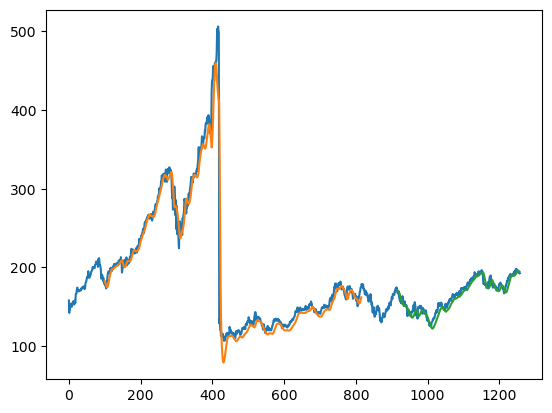

In [24]:
# ### Plotting 

# shift train predictions for plotting
look_back=100
trainPredictPlot = np.zeros(df_close.shape)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.zeros(df_close.shape)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# Forecasting : next 30 days

In [27]:
len(test_data)

441

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
x_input = x_input[0]
x_input

array([0.17871008, 0.17815905, 0.1777082 , 0.18189105, 0.17685661,
       0.17465247, 0.1682154 , 0.16944271, 0.17282405, 0.17630557,
       0.18604884, 0.17417658, 0.17976205, 0.18371947, 0.19356293,
       0.20240451, 0.20295554, 0.20693801, 0.20753914, 0.19053225,
       0.17713212, 0.17868503, 0.18164058, 0.17397621, 0.16874139,
       0.17257358, 0.17074515, 0.17815905, 0.18091421, 0.1719474 ,
       0.16804008, 0.17019411, 0.17342517, 0.16310582, 0.15927364,
       0.15992486, 0.1612273 , 0.16758923, 0.16420789, 0.16736381,
       0.17049468, 0.17695679, 0.18071384, 0.17921102, 0.18274264,
       0.18502192, 0.18036318, 0.18003757, 0.1761052 , 0.17282405,
       0.17187226, 0.16541014, 0.16571071, 0.16681277, 0.16095178,
       0.15040701, 0.15373826, 0.15892298, 0.16012523, 0.16814026,
       0.17715717, 0.17485285, 0.18131497, 0.18780213, 0.19048215,
       0.1892799 , 0.19927364, 0.19526612, 0.20187852, 0.2033062 ,
       0.20756418, 0.20751409, 0.21192235, 0.20989355, 0.21157

In [49]:
len(x_input)

100

In [83]:
forecast=[]
i=0
n_steps = 100
while i < 30:
    model_input = x_input[i:i+n_steps].reshape((1, n_steps,1))
    y_hat = model.predict(model_input, verbose=0)
    forecast.append(y_hat[0].tolist())
    x_input=np.hstack([x_input,y_hat[0]])
    print(y_hat)
    i+=1
print(forecast)

[[0.21715248]]
[[0.21588378]]
[[0.21479367]]
[[0.21383375]]
[[0.21295442]]
[[0.2121207]]
[[0.21131289]]
[[0.21052188]]
[[0.20974438]]
[[0.2089797]]
[[0.20822765]]
[[0.2074877]]
[[0.2067585]]
[[0.20603801]]
[[0.20532355]]
[[0.20461228]]
[[0.20390122]]
[[0.20318757]]
[[0.20246871]]
[[0.2017423]]
[[0.20100676]]
[[0.20026074]]
[[0.19950314]]
[[0.19873342]]
[[0.19795135]]
[[0.19715706]]
[[0.19635054]]
[[0.19553238]]
[[0.1947028]]
[[0.1938623]]
[[0.21715247631072998], [0.2158837765455246], [0.21479366719722748], [0.213833749294281], [0.21295441687107086], [0.21212069690227509], [0.2113128900527954], [0.2105218768119812], [0.2097443789243698], [0.20897969603538513], [0.20822764933109283], [0.20748770236968994], [0.2067584991455078], [0.20603801310062408], [0.20532354712486267], [0.20461228489875793], [0.20390121638774872], [0.20318756997585297], [0.20246870815753937], [0.20174230635166168], [0.20100675523281097], [0.20026074349880219], [0.19950313866138458], [0.19873341917991638], [0.19795134

# Plot for previous 100 days & forecast of next 30 days

In [63]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

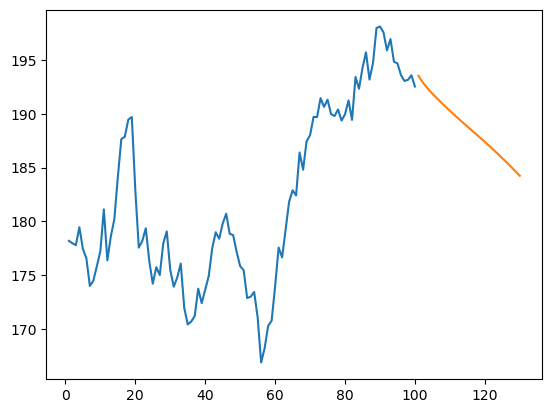

In [75]:
# plot for past 100 days 
plt.plot(day_new,scaler.inverse_transform(test_data[341:]))
# plot for forecast next 30 days
plt.plot(day_pred,scaler.inverse_transform(forecast))

# Plot forecast

In [78]:
day_new=np.arange(1,len(df_close)+1)
day_pred=np.arange(len(df_close)+1,len(df_close)+31)

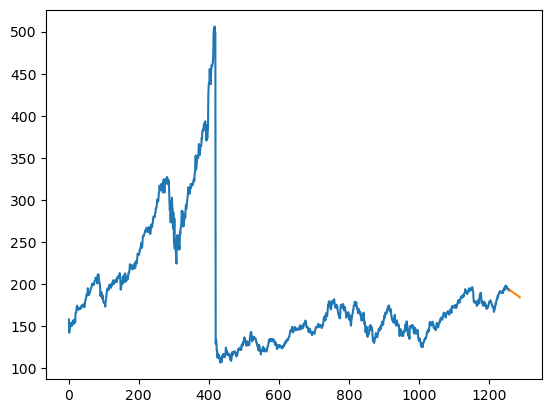

In [80]:
# plot for past days (all the data in df_close)
plt.plot(day_new,scaler.inverse_transform(df_close))
# plot for forecast next 30 days
plt.plot(day_pred,scaler.inverse_transform(forecast))